In [1]:
%matplotlib inline

In [2]:
#Sound File
# You need to install ffmpeg (brew install ffmpeg) for mac
# convert the files with 
# ffmpeg -i obama1.mp3 -vn -acodec pcm_s16le -ac 2 -ar 44100 -f wav obama1.wav
# http://www.wavsource.com/people/famous.htm
# http://download.wavetlan.com/SVV/Media/HTTP/http-wav.htm
sndFile1 = 'Yamaha-TG100-Saw-Ld-C5.wav'
sndFile4 = 'sheep1.wav'
superFile = 'test_stereo_8000Hz_8bit_PCM.wav'

In [3]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
from pylab import *
import wave as wv
import numpy as np

In [4]:
def getMetadata(filename):
    w_read = wv.open(filename)
    print "# of Channels:", w_read.getnchannels();
    print "Sample Width", w_read.getsampwidth();
    print "Frame Rate: (# of samples per second) ", w_read.getframerate();
    print "# of Frames (samples):", w_read.getnframes();
    print "Total time seconds:", w_read.getnframes() * 1.0 / w_read.getframerate();
    print "Total time milliseconds:", w_read.getnframes() * 1.0 / w_read.getframerate() * 1000;
    print "Compression Type:", w_read.getcomptype();
    print "Compression Name:", w_read.getcompname();
    w_read.close()

In [5]:
getMetadata(sndFile4);

# of Channels: 2
Sample Width 2
Frame Rate: (# of samples per second)  8000
# of Frames (samples): 8498
Total time seconds: 1.06225
Total time milliseconds: 1062.25
Compression Type: NONE
Compression Name: not compressed


Sampled Per Second: 8000
int16
Sound Data Shape (8498, 2)
Sample Points: 8498
Total Time (ms): 1062.25


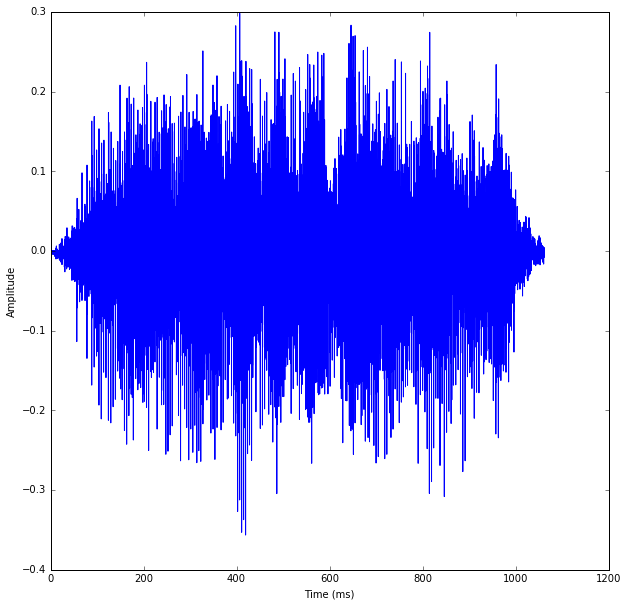

In [6]:
# http://samcarcagno.altervista.org/blog/basic-sound-processing-python/
# http://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
sampFreq, snd = wavfile.read(sndFile4);
print "Sampled Per Second:", sampFreq
print snd.dtype
snd = snd / (2.**15) # Normalize to -1 to 1
print "Sound Data Shape", snd.shape
(sample_points, _) = snd.shape
print "Sample Points:", sample_points
print "Total Time (ms):", sample_points * 1.0 / sampFreq * 1000.0
sound = snd[:,0] 

timeArray = arange(0, sample_points * 1.0, 1)
timeArray = timeArray / sampFreq * 1000.0

plt.figure(figsize = (10,10))
plt.plot(timeArray, sound)
ylabel('Amplitude')
xlabel('Time (ms)')


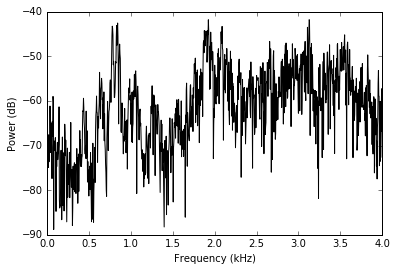

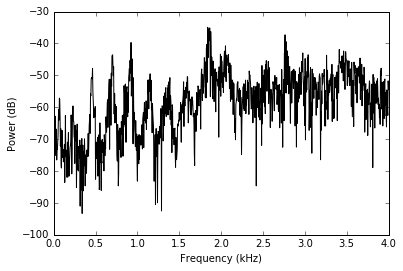

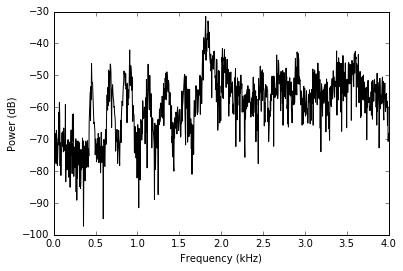

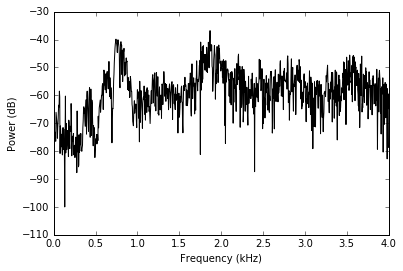

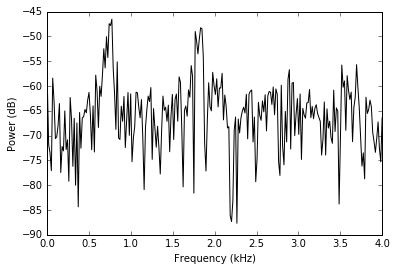

In [7]:

chunkSize = 2000 # Frames
chunks = [sound[i:i+chunkSize] for i in xrange(0, len(sound), chunkSize)]

for chunk in chunks:
    p = fft(chunk)
    n = len(chunk)
    nUniquePts = ceil((n+1)/2.0)
    p = p[0:int(nUniquePts)]
    p = abs(p)

    p = p / float(n)
    p = p**2
    if n % 2 > 0:
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq * 1.0 / n);
    plt.figure()
    plt.plot(freqArray/1000, 10*log10(p), color='k')
    xlabel('Frequency (kHz)')
    ylabel('Power (dB)')


(47, 92)


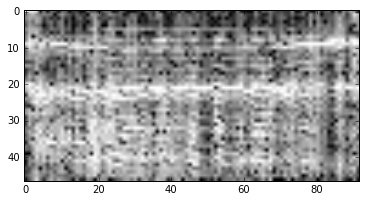

In [8]:
chunkSize = int(sqrt(sample_points)) # Frames
chunks = [sound[i:i+chunkSize] for i in xrange(0, len(sound), chunkSize)]

nUniquePts = int(ceil((chunkSize+1)/2.0))
output = zeros((nUniquePts,len(chunks[:-1])))
i = 0;
for chunk in chunks[:-1]:
    p = fft(chunk)
    p = p[0:nUniquePts]
    p = abs(p)

    p = p / float(chunkSize)
    p = p**2
    if chunkSize % 2 > 0:
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2

    logp = 10*log10(p)
    logp = logp - min(logp)
    logp = logp / max(logp) * 255

    output[:,i] = logp
    i += 1

plt.imshow(output, cmap=plt.get_cmap('gray'))
print output.shape

In [9]:
def showVV(file_name):
    sampFreq, snd = wavfile.read(file_name);
    print "Sampled Per Second:", sampFreq
    print snd.dtype
    snd = snd / (2.**15) # Normalize to -1 to 1
    print "Sound Data Shape", snd.shape
    (sample_points, _) = snd.shape
    print "Sample Points:", sample_points
    print "Total Time (ms):", sample_points * 1.0 / sampFreq * 1000.0
    sound = snd[:,0] 

    timeArray = arange(0, sample_points * 1.0, 1)
    timeArray = timeArray / sampFreq * 1000.0

    chunkSize = int(sqrt(sample_points)) # Frames
    chunks = [sound[i:i+chunkSize] for i in xrange(0, len(sound), chunkSize)]

    nUniquePts = int(ceil((chunkSize+1)/2.0))
    output = zeros((nUniquePts,len(chunks[:-1])))
    i = 0;
    for chunk in chunks[:-1]:
        p = fft(chunk)
        p = p[0:nUniquePts]
        p = abs(p)

        p = p / float(chunkSize)
        p = p**2
        if chunkSize % 2 > 0:
            p[1:len(p)] = p[1:len(p)] * 2
        else:
            p[1:len(p) -1] = p[1:len(p) - 1] * 2

        logp = 10*log10(p)
        logp = logp - min(logp)
        logp = logp / max(logp) * 255

        output[:,i] = logp
        i += 1

    plt.figure(figsize = (10,10))
    plt.imshow(output, cmap=plt.get_cmap('gray'))
    print output.shape

Sampled Per Second: 44100
int16
Sound Data Shape (44804, 2)
Sample Points: 44804
Total Time (ms): 1015.96371882
(106, 212)


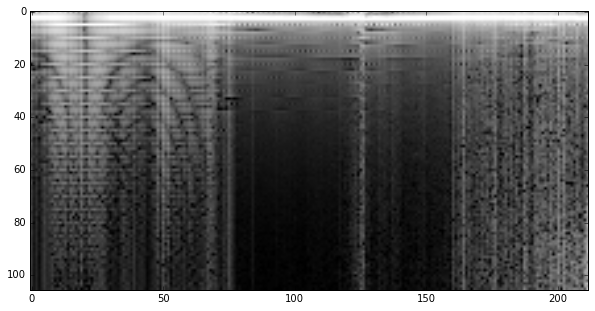

In [13]:
showVV(sndFile1)

Sampled Per Second: 8000
uint8
Sound Data Shape (118018, 2)
Sample Points: 118018
Total Time (ms): 14752.25
(172, 344)


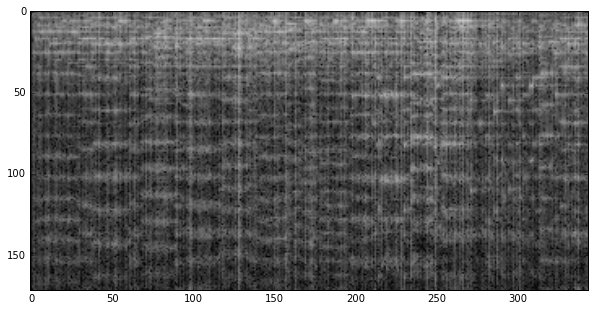

In [11]:
showVV(superFile)

Sampled Per Second: 8000
int16
Sound Data Shape (8498, 2)
Sample Points: 8498
Total Time (ms): 1062.25
(47, 92)


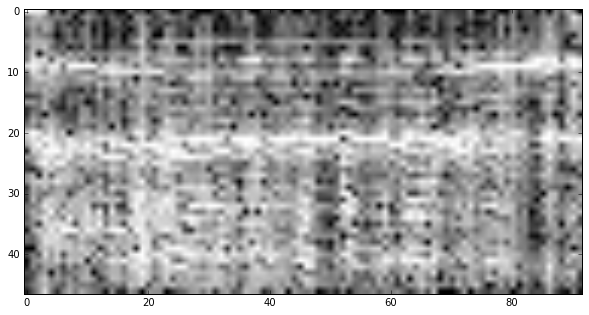

In [12]:
showVV(sndFile4)